# Thin Rod Temperature Profile Modeling

The objective of this project is to compare the temperature profiles of 3 rods of identical measurements (30 cm long), but different materials. The temperature profiles will be modeled over a timespan of 120 seconds. The scenario supposes that each rod begins at 10 degrees Celsius and that there is a constant heat source at both ends of the rod, one at 150 degrees Celsius, and one at 50 degrees Celsius. These temperature profiles will be modeled in both 2- and 3-dimensional plots.

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Given info:

$$ T_i = 10 ^\circ C $$
$$ T_H = 150 \space ^\circ C $$
$$ T_C = 50 \space ^\circ C $$
$$ L = 30 \space cm $$

PDE to solve:

$$ k\frac{\delta^2 T}{\delta x^2} = \rho C_p \frac{\delta T}{\delta t}$$

By using the central finite difference and the forward finite difference, this PDE can be rewritten as:

$$ T^{l+1}_i = T^l_i + \frac{k \Delta t}{\rho C_p \Delta x^2}(T^l_{i+1} - 2T^l_i + T^l_{i-1})$$


I chose the materials Manganese (M), Gold (G), and Copper (C) because they have a good range of thermal conductivities, densities, and heat capacities, so the results when compared with one another should be interesting.

Thermal conductivity data ($k=[\frac{W}{m*K}]$):

[Thermal Conductivity Source](https://en.wikipedia.org/wiki/List_of_thermal_conductivities)
$$ k_M = 7.810 $$
$$ k_G = 318 $$
$$ k_C = 401 $$

Density ($\rho=[\frac{kg}{m^3}]$):

[Density Source](https://en.wikipedia.org/wiki/Densities_of_the_elements_(data_page)#WEL)
$$ \rho_M = 7470 $$
$$ \rho_G = 19300 $$
$$ \rho_C = 8920 $$


Heat Capacities ($C_p = [\frac{J}{kg*K}]$):

[Heat Capacity Source](https://us.misumi-ec.com/blog/specific-heat-capacity-of-metals/)
$$ C_{p,M} = 479 $$
$$ C_{p,G} = 129 $$
$$ C_{p,C} = 386 $$



In [176]:
#Defining material properties by putting them in an array [thermal conductivity, density, heat capacity]
M = [7.810, 7470, 479]
G = [318, 19300, 129]
C = [401, 8920, 386]

This data can be combined into a single property called thermal diffusivity by using the definition:

$$ \alpha = \frac{k}{\rho C_p} $$

In [177]:
def alpha(props):
    '''
    This function calculates the thermal diffusivity (alpha [cm^2/s]) from the thermal conductivity (k [W/m*K]),
    density (rho [kg/m^3]), and heat capacity (Cp [J/kg*K]) of a certain material. Alpha will later be used to solve the PDE.

    Inputs
    props (list) - list of properties of the material [k, rho, Cp]\

    Return
    alpha (float) - thermal diffusivity value after being converted to [cm^2/s]
    
    '''
    k = props[0]
    rho = props[1]
    Cp = props[2]
    
    #Calculating alpha in m^2/s with properties
    a = k/(rho*Cp)
    
    #Converting alpha into units of cm^2/s instead of m^2/s since the rod length is given in cm
    alpha = a*(100**2)
    
    return alpha

Now, to further simplify the PDE, $\alpha$, $\Delta t$, and $\Delta x$ can be combined with this definition:
$$ \beta = \frac{\alpha\Delta t}{\Delta x^2} $$

After the substitution of $\alpha$ and $\beta$, the derived equation becomes:
$$ T^{l+1}_i = T^l_i + \beta(T^l_{i+1} - 2T^l_i + T^l_{i-1})$$

In [178]:
def beta(alpha, dt, dx):
    '''
    The purpose of this function is to calculate beta using alpha, dt, and dx. Beta will be used in PDE calculations.

    Inputs
    alpha (float) - thermal diffusivity value calculated using alpha function above
    dt (float) - time step
    dx (float) - space dimension step


    Return
    beta (float) - combined constant
    '''
    
    beta = alpha*dt/(dx**2)
    
    return beta

In [179]:
#Calculating alpha for each material, I have printed them to check if they look right
aM = alpha(M)
aG = alpha(G)
aC = alpha(C)
print(aM, aG, aC)

0.02182704373513539 1.2772623207615375 1.1646413717790842


In [180]:
#Defining time and space step sizes
dt = 0.3 #[s]
dx = 1 #[cm]

#Calculating beta for each material
bM = beta(aM, dt, dx)
bG = beta(aG, dt, dx)
bC = beta(aC, dt, dx)

#Defining total rod length using given info
L = 30 #cm

#Defining total number of steps taken along rod
n = int(L/dx)+1

#Defining total time (time of interest is 2 mins)
tf = 120 #s

#Creating time and rod length array
t = np.arange(0,tf+0.1,dt)
length = np.arange(0,30.5,dx)

In [181]:
def temp(n, t, beta):
    '''
    This function is meant to take the total number of steps, timepoints, and beta value, 
    and calculate the temperature profile along the rod.

    Inputs
    n (int) - total number of steps along length of rod defined above
    time (array) - array containing all the time values the temperature will be calculated at
    beta (float) - combined constant calculated using the material's parameters, the alpha function, and the beta function

    Return
    tmat (array) - matrix of temperatures calculated over length and time
    '''
    #Placeholder matrix to be filled in later, dimensions of time x length
    tmat = np.zeros((len(t), n))

    #Defining the first and last position as the boundary conditions
    tmat[:,0] = 150
    tmat[:,-1] = 50
    tmat[0,1:-1] = 10

    #Iterating over time
    for tstep in range(0,len(t)-1):

        #Iterating over length
        for xstep in range(1,n-1):

            #Calculating new temperature and putting it in the matrix
            tmat[tstep+1,xstep] = tmat[tstep,xstep] + beta*(tmat[tstep,xstep+1] - 2*tmat[tstep,xstep] + tmat[tstep,xstep-1])

    return tmat

In [182]:
#Using the temp function defined above, the temperature profiles can be solved
tempM = temp(n, t, bM)
tempG = temp(n, t, bG)
tempC = temp(n, t, bC)

#Checking size of matrices
print(tempM.shape)
print(tempG.shape)
print(tempC.shape)

(401, 31)
(401, 31)
(401, 31)


## 2D PLOTS

Text(0, 0.5, 'Temperature ($\\degree$ C)')

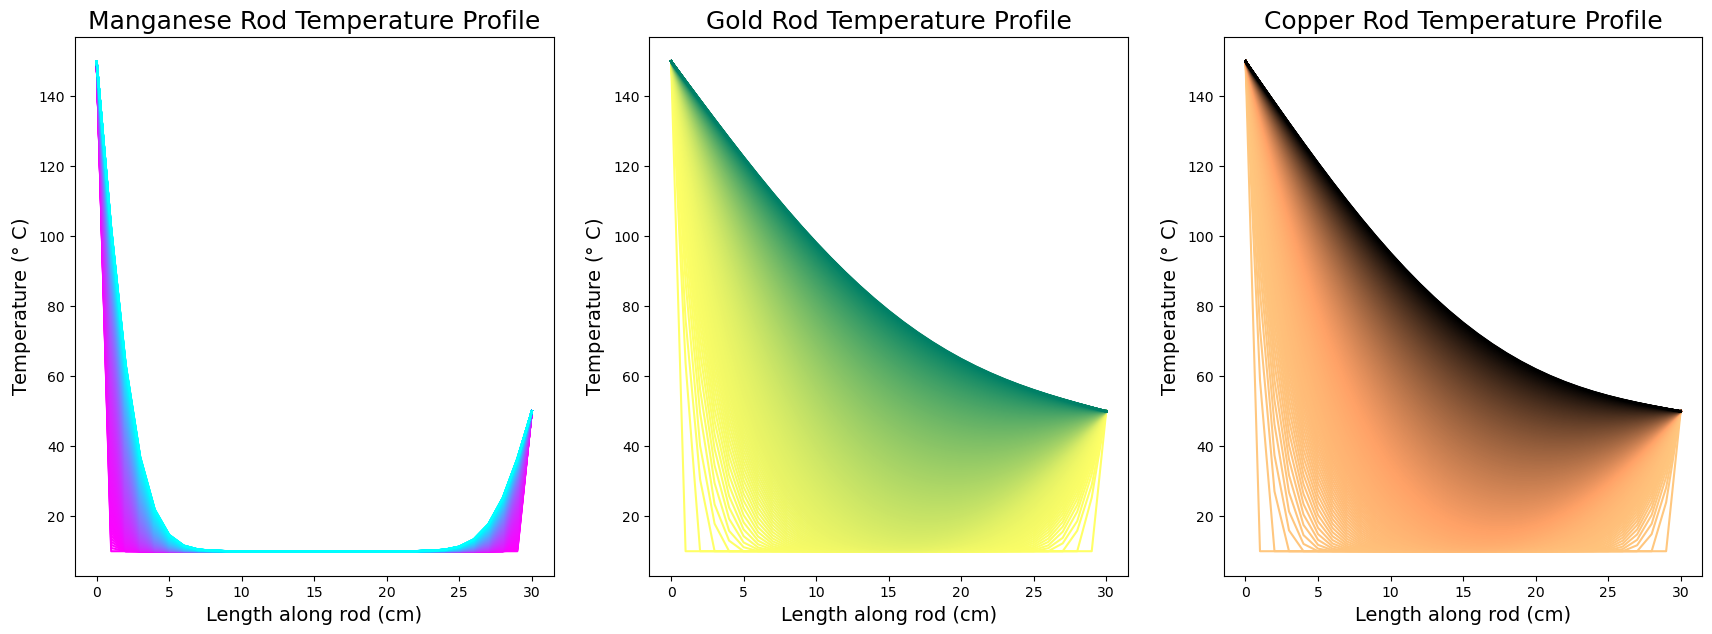

In [183]:
#Creating a figure with 3 subplots so I can plot all 3 graphs together
fig, ax = plt.subplots(1,3,figsize=(21,7))

#The first 3 lines link the colormaps to the time values, so the color of each point will correspond to the time. Then, the for loop makes sure 
#all temperature values in each temperature matrix at the same time will be the same color and plots them on their appropriate subplot.
colM = plt.cm.cool(np.linspace(1,0,len(t)))
colG = plt.cm.summer(np.linspace(1,0,len(t)))
colC = plt.cm.copper(np.linspace(1,0,len(t)))
for i in range(len(t)):
    ax[0].plot(length, tempM[i,:], c=colM[i])
    ax[1].plot(length, tempG[i,:], c=colG[i])
    ax[2].plot(length, tempC[i,:], c=colC[i])

#Setting labels
ax[0].set_title('Manganese Rod Temperature Profile', fontsize=18)
ax[1].set_title('Gold Rod Temperature Profile', fontsize=18)
ax[2].set_title('Copper Rod Temperature Profile', fontsize=18)

ax[0].set_xlabel('Length along rod (cm)', fontsize=14)
ax[1].set_xlabel('Length along rod (cm)', fontsize=14)
ax[2].set_xlabel('Length along rod (cm)', fontsize=14)

ax[0].set_ylabel('Temperature ($\degree$ C)', fontsize=14)
ax[1].set_ylabel('Temperature ($\degree$ C)', fontsize=14)
ax[2].set_ylabel('Temperature ($\degree$ C)', fontsize=14)


## 3D PLOTS

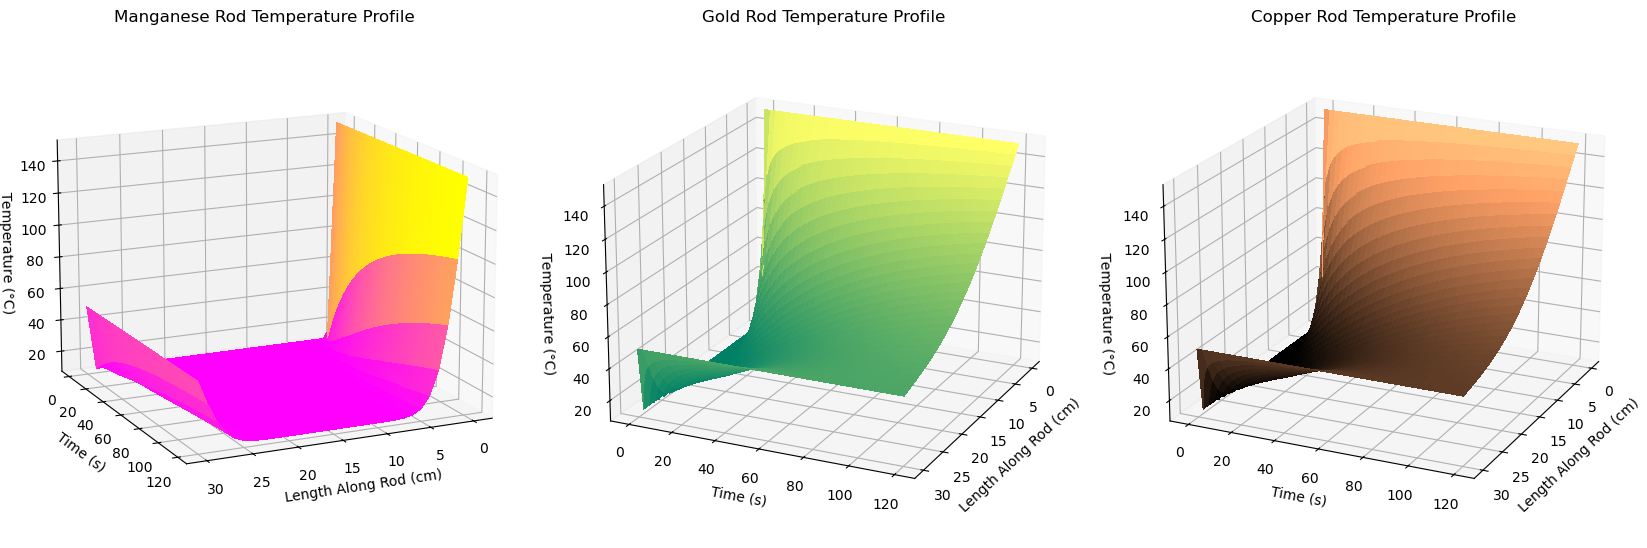

In [184]:
#Creating a figure on which I can plot all surfaces together
fig, ax = plt.subplots(1,3,subplot_kw={"projection":"3d"},figsize=(21,7))

#Stitching my length and time vectors together
x,y = np.meshgrid(length, t)

#Plotting each surface on its own subplot
ax[0].plot_surface(x,y,tempM, cmap=cm.spring,linewidth=0, antialiased=False)
ax[1].plot_surface(x,y,tempG,cmap=cm.summer,linewidth=0, antialiased=False)
ax[2].plot_surface(x,y,tempC,cmap=cm.copper,linewidth=0, antialiased=False)

#Specifying the rotation of each subplot to get the best view of the surface
ax[0].view_init(15,65)
ax[1].view_init(20,25)
ax[2].view_init(20,25)

#Axis and subplot labels
ax[0].set_title('Manganese Rod Temperature Profile')
ax[1].set_title('Gold Rod Temperature Profile')
ax[2].set_title('Copper Rod Temperature Profile')

ax[0].set_ylabel('Time (s)')
ax[1].set_ylabel('Time (s)')
ax[2].set_ylabel('Time (s)')

ax[0].set_xlabel('Length Along Rod (cm)')
ax[1].set_xlabel('Length Along Rod (cm)')
ax[2].set_xlabel('Length Along Rod (cm)')

ax[0].set_zlabel('Temperature ($\degree$C)')
ax[1].set_zlabel('Temperature ($\degree$C)')
ax[2].set_zlabel('Temperature ($\degree$C)')

#Adjusting the space in between sub plots so the z-axis labels aren't cut off
fig.subplots_adjust(wspace=0.1)

Personally, I prefer the 2d graphs to show these results because I find it easier to comprehend when all the time intervals are in the same plane rather than trying to process 3 different axes at once.